In [11]:
import numpy as np
import matplotlib.pylab as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL,LeastSquares

In [12]:
data = []
with open('coordinate.txt', 'r') as input:
    lines = input.readlines()
    for i in lines:
        print(i.replace('\n','').split(' '))

['0.2', '0.38177']
['0.5', '0.629027']
['0.8', '1.02582']
['1.1', '0.762302']
['1.4', '0.556233']
['1.7', '0.12172']


In [13]:
data = np.loadtxt('coordinate.txt', dtype=float, unpack=True)

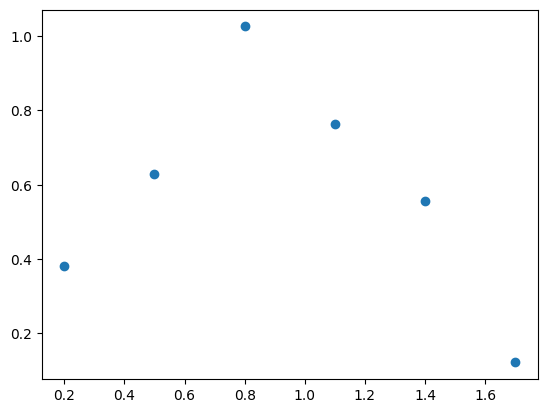

In [14]:
plt.scatter(data[0],data[1])
plt.show()

In [15]:
def pdf(x,a,b,c):
    return a*x**2+b*x+c

In [16]:
# cost = UnbinnedNLL(data[1],pdf)
yerror = .2*np.ones(len(data[0]))
cost = LeastSquares(data[0],data[1],yerror,pdf)
my_minuit = Minuit(cost,a=-1.5,b=2,c=0)
my_minuit.limits['a']=(-np.inf,0)
my_minuit.migrad()
my_minuit.hesse()
print(my_minuit.valid)
display(my_minuit)

True


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.8904 (χ²/ndof = 0.3)     │              Nfcn = 84               │
│ EDM = 5.13e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -1.2    │    0.4    │            │            │         │    0    │       │
│ 1 │ b    │    2.0    │    0.7    │            │            │         │         │       │
│ 2 │ c    │   0.00    │   0.29    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │  0.132  -0.25   0.08 │
│ b │  -0.25  0.503  -0.18 │
│ c │   0.08  -0.18 0.0838 │
└───┴──────────────────────┘

In [17]:
print(f"Q squared: {my_minuit.fval}")

Q squared: 0.8903917794459105


In [18]:
a,b,c = my_minuit.values['a','b','c']
err_a,err_b,err_c = my_minuit.errors['a','b','c']

print(f"y = ({a}+-{err_a}) + ({b}+-{err_b}) + ({c}+-{err_c})")

y = (-1.1546861089968041+-0.36221868327947915) + (2.0241350707449532+-0.7091189160899669) + (0.0017140457889137685+-0.2894137858498847)


In [19]:
def max_sez_aurea(func,xmin,xmax,*args,prec=.0001):
    '''func of type f(x,args)'''
    r = (-1+np.sqrt(5))/2  #golden ratio

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(b,*args) < func(a,*args):
            xmin = b
        else: 
            xmax = a

    return xmin,func(xmin,*args)

In [20]:
xmax,ymax = max_sez_aurea(pdf,np.min(data[0]),np.max(data[0]), a,b,c)
print(xmax,ymax)

0.8764350230865973 0.8887782310696475
